#### Question 3 (3 points)

a. Use the synthetic dataset (created below) to train a logistic regression model on the training set. Calculate the AUC of your prediction on the test set.

In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import preprocessing as preproc
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
import random
from random import sample 
import numpy as np
from matplotlib import pyplot as plt







X, y = datasets.make_classification(n_samples=2000, n_features=20,
                                    n_informative=3)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [2]:
# Your code goes here

logreg = LogisticRegression(solver='lbfgs')

logreg.fit(X_train, y_train)

probs = logreg.predict_proba(X_test)[:,1]

AUC = roc_auc_score(y_test, probs)
print("AUC= ", AUC)

AUC=  0.8635946223920071


b. Randomly sample 100, 300, and 1000 data points from the training set. For each sample size, randomly sample 1000 times, each time fit a logistic regresson, predict on the test set and calcuate the AUC. Plot a distribution of the 1000 AUCs for each sample size on the same plot. Also, plot the AUC you get from 3a as a verticle line on the same plot as well. (Hints: Plot [distributions/histogram](https://stackoverflow.com/questions/6871201/plot-two-histograms-on-single-chart-with-matplotlib).) 

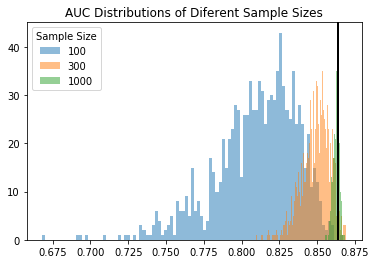

In [8]:
# Your code goes here
indexes = []
for x in range(len(X_train)):
    indexes.append(x)
    
sampleSizes = [100, 300, 1000]
for size in sampleSizes:
    aucs = []
    for i in range(1000):
        sample = random.sample(indexes, size)
        xSample = X_train[sample]
        ySample = y_train[sample]
        logreg = LogisticRegression(solver='lbfgs')
        logreg.fit(xSample, ySample)
        probs = logreg.predict_proba(X_test)[:,1]
        auc = roc_auc_score(y_test, probs)
        aucs.append(auc)
    bins = np.linspace(min(aucs), max(aucs), 100)

    plt.hist(aucs, bins, alpha=0.5, label= size)
plt.axvline(AUC, color='black', linewidth=2)
plt.legend(title = 'Sample Size', loc='upper left')
plt.title('AUC Distributions of Diferent Sample Sizes')
plt.show()


c. What pattern did you see from the plot you get from 3b? Explain your findings.

The larger the sample size, the narrower the histogram/ bell-shaped distribution becomes. Also the peak of the distribution (also the entire curve) is shifted right with increasing sample sizes indecating higher AUCs. This indicates that the higher the sample sizes, will led to overall higher and more consistant AUCs. Higher AUCs indicate better models. The AUC from 3a (the vertical line) is just about where the peak of the 1000 sample distribution lies which also shows the accuracy/more reliable model with a larger sample size.